## Lesson 3 - Neural net foudnations

[FAQ, resources and official course updates](https://forums.fast.ai/t/faq-resources-and-official-course-updates/95292)

Lecture summary:

* Recommend to watch [Lessson 0](https://www.youtube.com/watch?v=gGxe2mN3kAg)  for "how to fast.ai".    Note that "Lesson 0" is quite old (2020 is old now!) and some of the last stuff at the end (the stuff about using AWS EC2) refers to documents that fast.ai doesn't provide anymore as far as I can tell. 

* Review of student work.

* Introduction of Paperspace Gradient

   - Note thatI use this, it is not really the best anymore since Digital Ocean bought them though. [Downtime](https://status.paperspace.com/) is more frequent then i would like, and machine startup can be SLOW.
   - Best feature is the ability to use the remote desktop.
   - You can use jupyter lab through there.

* Improving pet classifier by using other models- `timm` module has many models you can try. If you use timm, just use the model name as a string in `vision_learner`.

* fast.ai stores categories in `dls.vocab` 

### Look at the model!

In [1]:
from fastai.vision.all import *

# need the is cat function!
def is_cat(x): return x[0].isupper()

learn = load_learner('model.pkl')
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

Layers upon layers ! *Deep* learning.

In [2]:
l = learn.model.get_submodule('0.1')   # this is a BatchNorm2d layer
l

BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [3]:
list(l.parameters())  # parameters is a generator, so we convert it to a list

[Parameter containing:
 tensor([ 2.3446e-01,  2.6621e-01, -5.1096e-08,  5.1795e-01,  3.4404e-09,
          2.2224e-01,  4.2251e-01,  1.3153e-07,  2.5180e-01,  1.5152e-06,
          3.1656e-01,  2.4947e-01,  3.7797e-01,  1.0862e-05,  2.7471e-01,
          2.3831e-01,  2.4306e-01,  3.9593e-01,  4.7155e-01,  2.9069e-01,
          2.7300e-01,  2.7844e-01,  2.9069e-01,  2.0527e-01,  2.6012e-01,
          2.7987e-01,  2.9207e-01,  3.1485e-01,  3.8960e-01,  3.0314e-01,
          2.6662e-01,  2.1045e-01,  2.8660e-01,  3.3190e-01,  4.2864e-01,
          3.7165e-01,  7.4804e-08,  1.9039e-01,  1.4740e-08,  2.2395e-01,
          1.8058e-01,  2.4862e-01,  2.7337e-01,  2.5842e-01,  2.9521e-01,
          2.9983e-01,  2.2335e-01,  2.6272e-01,  2.2001e-08,  2.6464e-01,
          2.1989e-01,  2.8322e-01,  3.2972e-01,  2.2612e-01,  3.6701e-01,
          2.1193e-01,  2.3936e-01,  2.5123e-01,  5.2742e-01,  2.4820e-01,
          2.9512e-01,  2.5859e-01,  4.8475e-01,  2.6641e-01],
        requires_grad=True)

## How does a neural network really work?
[Video: 23.51](https://youtu.be/hBBOjCiFcuo?t=1431)

[Kaggle notebook](https://www.kaggle.com/code/jhoward/how-does-a-neural-net-really-work)

Aside: `@interact` is really cool!   [Documentation](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)

The notebook above shows how gradient descent can help fit a function (using torch autograd) and also discusses the [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem).   

In [18]:
from ipywidgets import interact

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100,dtype= torch.double)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

In [19]:
import torch.nn.functional as F
def rectified_linear(m,b,x): return F.relu(m*x+b)

def triple_relu(m1,b1,m2,b2,m3,b3,x):


    return rectified_linear(m3,b3,x)+rectified_linear(m2,b2,x) +  rectified_linear(m1,b1,x)

In [20]:
@interact(m1=-1.5, b1=0.6, m2=1.5, b2=2.2,  m3 =0.4, b3 =0.6)
def plot_triple_relu(m1, b1, m2, b2, m3, b3):
    plot_function(partial(triple_relu, m1,b1,m2,b2,m3,b3), ylim=(-1,6))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=0.6, des…

   ### Aside 
   
   Note that we could also vary the coefficients in front of each term as well as add an offset, 
   which is needed to get full flexibility and is what a simple single hidden layer neural network would look like.


In [21]:
# simple single hidden layer network with 3 hidden units:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1,3,dtype = torch.float64)
        self.output = nn.Linear(3,1, dtype = torch.float64)
    def forward(self, x):
        return self.output(F.relu(self.hidden(x)))
    
model = NN()
list(model.parameters())

[Parameter containing:
 tensor([[-0.8812],
         [ 0.2107],
         [-0.5623]], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([ 0.9437,  0.0341, -0.6030], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([[ 0.0553, -0.1383,  0.1195]], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.5192], dtype=torch.float64, requires_grad=True)]

In [22]:
[model.hidden.weight, model.hidden.bias]

[Parameter containing:
 tensor([[-0.8812],
         [ 0.2107],
         [-0.5623]], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([ 0.9437,  0.0341, -0.6030], dtype=torch.float64, requires_grad=True)]

The parameters of the hidden layer are the three `m` and `b` variables we had before, but we can combine the three units in any linear combination, which are the paramters of the output layer

In [23]:
[model.output.weight, model.output.bias]

[Parameter containing:
 tensor([[ 0.0553, -0.1383,  0.1195]], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.5192], dtype=torch.float64, requires_grad=True)]

For fun lets fit this to that noisy quadratic

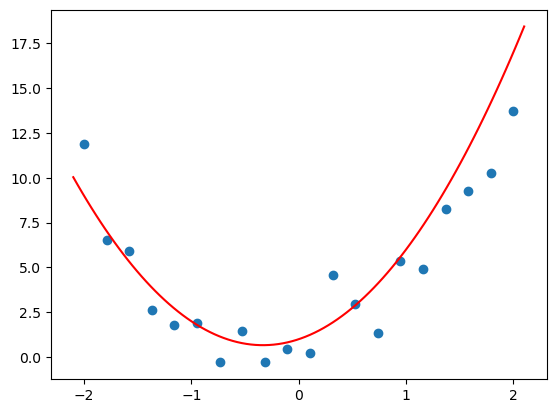

In [24]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)
np.random.seed(42)

def f(x): return 3*x**2 + 2*x +1 

x = torch.linspace(-2, 2, steps=20, dtype=torch.double)[:,None]
y = add_noise(f(x), 0.15, 1.5)

plt.scatter(x, y)
plot_function(f)

In [25]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# this is a dumb trainer 
def fit(nsteps=40): 
    for i in range(nsteps): 
        loss = loss_fn(model(x), y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 100 == 0: print(loss.item())


## Regression model in a spreadsheet 

1:00:00

In [26]:
fit(600)

33.494813524070345
6.182852408709815
3.467671398526383
2.501904420368954
2.1735171017702335
1.9857210557051626


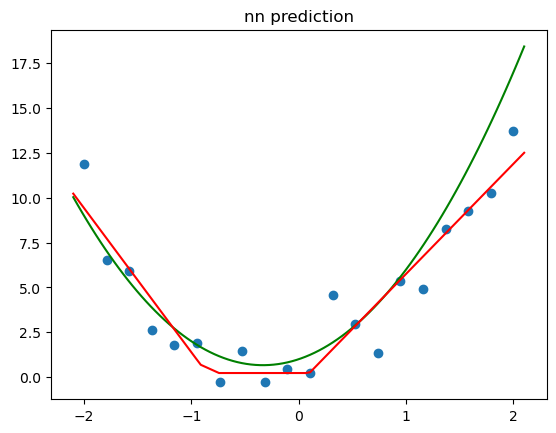

In [29]:
# plot the model's predictions
plt.scatter(x, y)
plot_function(f, color='g')
def predict(x): return model(x).detach()
plot_function(predict, "nn prediction")
 
